In [1]:
import pandas as pd
import seaborn as sns

In [2]:
#load the titanic dataset from seaborn 
df=sns.load_dataset('titanic')

### *Basic Information*

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# display basic information about the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
# display basic statistics of the dataset
df.describe() 

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# number of rows in the dataset
len(df)

891

In [7]:
# find missing values in the dataset / null values / NAN
df.isnull() # check the number of missing values in each column
df.isnull().sum() # count the missing values
df.isnull().sum() / len(df) * 100 # percentage of missing values

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

<Axes: >

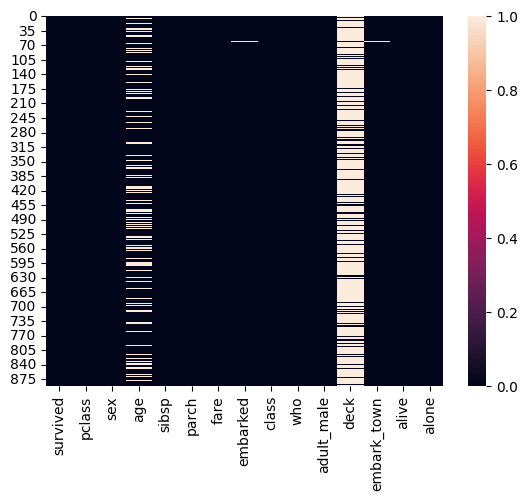

In [8]:
# visualize missing values
sns.heatmap(df.isnull()) 
#sns.heatmap(df.isnull(), cbar=False) # without color bar

`Statistical Conecpts`

- Average | Mean
- Median 
- Mode

`Note` : *will help you to handle missing values or impute missing values*

In [9]:
#unique values in sex column
df['sex'].unique() 

array(['male', 'female'], dtype=object)

In [10]:
df['sex'] # select one column 
df[['sex' , 'age' ]] # select multiple columns

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
...,...,...
886,male,27.0
887,female,19.0
888,female,NaN
889,male,26.0


In [11]:
df['sex'].nunique() # number of unique values in column
#df.sex.nunique() # same as above

2

In [12]:
# number of unique values in each column
df.nunique() 

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [13]:
# print the column names
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [14]:
df['embark_town'].unique() # unique values in embark_town column

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [15]:
df['embark_town'].value_counts() # count the unique values in embark_town column

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [16]:
df.groupby('sex')['fare'].mean() # to find the average fare for each sex

sex
female    44.479818
male      25.523893
Name: fare, dtype: float64

In [17]:
df.groupby('survived')['fare'].mean() # to find the average fare for each survival status

survived
0    22.117887
1    48.395408
Name: fare, dtype: float64

In [18]:
# group by multiple columns
df.groupby(['survived', 'sex'])['fare'].mean() # average fare by survival status and sex

survived  sex   
0         female    23.024385
          male      21.960993
1         female    51.938573
          male      40.821484
Name: fare, dtype: float64

In [19]:
df.groupby(['survived', 'who']).size() # count the number of passengers by survival status and who

survived  who  
0         child     34
          man      449
          woman     66
1         child     49
          man       88
          woman    205
dtype: int64

In [20]:
correltion=df[['age', 'fare', 'sibsp', 'parch']].corr() # correlation matrix for numerical columns
correltion

,age,fare,sibsp,parch
age,1.000000,0.096067,-0.308247,-0.189119
fare,0.096067,1.000000,0.159651,0.216225
sibsp,-0.308247,0.159651,1.000000,0.414838
parch,-0.189119,0.216225,0.414838,1.000000


<Axes: >

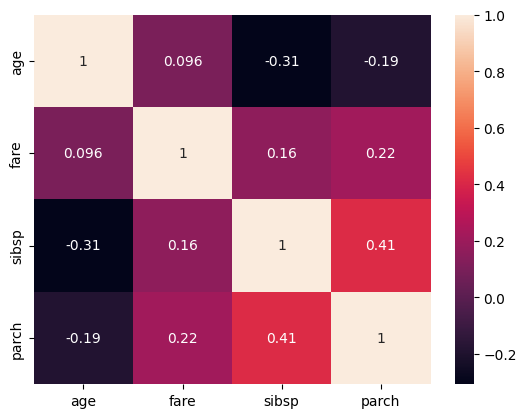

In [21]:
# heatmap of correlation matrix
sns.heatmap(correltion ,  annot=True) 

In [22]:
# pairplot
#sns.pairplot(df)

## Handle Missing Values

`Tips to handle missing values`
- if you have missing value more then 70% then drop that column
- if you have 10% , 20% , 30% missing values then impute that value.

In [23]:
df.isnull().sum() / len(df) * 100 # percentage of missing values

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [24]:
df.drop('deck', axis=1, inplace=True) # drop the deck column because having 70% missing values

In [25]:
print(df['age'].mean())
print(df['age'].median())
print(df['age'].mode()[0])

29.69911764705882
28.0
24.0


In [26]:
# fill missing values in age column with the mean
df['age'].fillna(df['age'].mean(), inplace=True) # fill missing 

C:\Users\ahmad\AppData\Local\Temp\ipykernel_26048\1416178119.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True) # fill missing


In [27]:
df.isnull().sum() 

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [28]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True) # fill missing values in embarked column with the mode
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True) # fill missing values in embark_town column with the mode

C:\Users\ahmad\AppData\Local\Temp\ipykernel_26048\391482948.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True) # fill missing values in embarked column with the mode
C:\Users\ahmad\AppData\Local\Temp\ipykernel_26048\391482948.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

In [29]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

<Axes: >

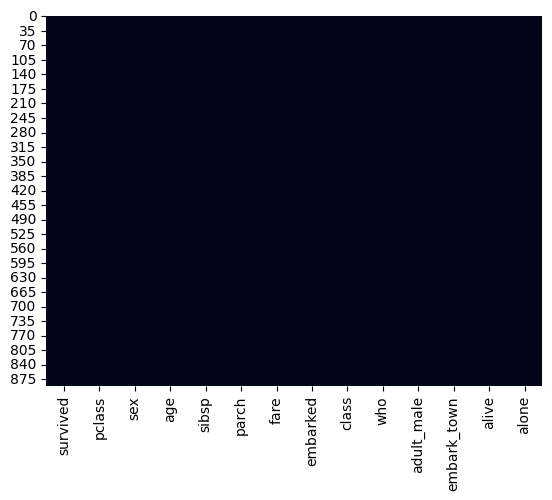

In [30]:
sns.heatmap(df.isnull(), cbar=False) # visualize missing values after filling

- Now no missing values in the data
- alot of other methods to impute missing values but we discuss few of them here.

## Binning

- divide data into different groups

<Axes: xlabel='age', ylabel='Count'>

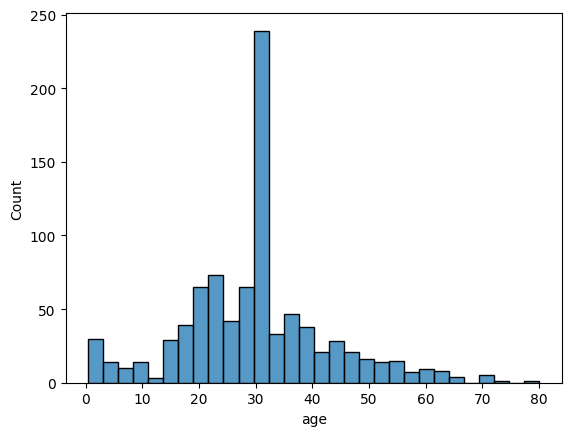

In [31]:
sns.histplot(df['age']) # histogram of age column

`How we do binning`
- 0-1=babies
- 1-5=Todlers
- 5-12=kids
- 12-18=teens
- 18-30=young
- 30-50=middle
- 50-80=old

In [32]:
# binning of age column
bins=[0,1,5,12,18,30,50,80]
labels=['Infants', 'Toddlers', 'Kids', 'Teens', 'Young Adults', 'Middle Aged', 'Old']

#which column to bin
pd.cut(df['age'], bins=bins, labels=labels)

0      Young Adults
1       Middle Aged
2      Young Adults
3       Middle Aged
4       Middle Aged
           ...     
886    Young Adults
887    Young Adults
888    Young Adults
889    Young Adults
890     Middle Aged
Name: age, Length: 891, dtype: category
Categories (7, object): ['Infants' < 'Toddlers' < 'Kids' < 'Teens' < 'Young Adults' < 'Middle Aged' < 'Old']

In [33]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


## Feature Engineering

In [34]:
# binning of age column
bins=[0,1,5,12,18,30,50,80]
labels=['Infants', 'Toddlers', 'Kids', 'Teens', 'Young Adults', 'Middle Aged', 'Old']

#which column to bin
df['binned_age']=pd.cut(df['age'], bins=bins, labels=labels)

In [35]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,binned_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Young Adults
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Middle Aged
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Young Adults
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Middle Aged
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Middle Aged


In [36]:
df['binned_age'].value_counts()

binned_age
Young Adults    447
Middle Aged     241
Teens            70
Old              64
Toddlers         30
Kids             25
Infants          14
Name: count, dtype: int64

In [37]:
# rename a column
df.rename(columns={'binned_age': 'age_group'}, inplace=True) # rename binned_age to age_group

In [38]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Young Adults
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Middle Aged
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Young Adults
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Middle Aged
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Middle Aged


## Filter the data

In [39]:
new_df=df[['survived', 'age_group', 'fare','class']]

In [40]:
new_df.head()

,survived,age_group,fare,class
0,0,Young Adults,7.2500,Third
1,1,Middle Aged,71.2833,First
2,1,Young Adults,7.9250,Third
3,1,Middle Aged,53.1000,First
4,0,Middle Aged,8.0500,Third


In [41]:
df['class'].unique() # unique values in class column

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [42]:
new_df[new_df['class'] == 'First'].value_counts() # filter the data for first class passengers 

survived  age_group     fare      class
0         Old           26.5500   First    5
1         Middle Aged   26.5500   First    4
          Young Adults  30.0000   First    3
          Middle Aged   26.2875   First    3
0         Middle Aged   52.0000   First    3
                                          ..
1         Old           80.0000   First    1
                        83.1583   First    1
                        93.5000   First    1
                        146.5208  First    1
                        153.4625  First    1
Name: count, Length: 174, dtype: int64

In [43]:
# select those who paid more then 200 punds
new_df_fare=new_df[new_df['fare'] > 200]
new_df_fare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 27 to 779
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   survived   20 non-null     int64   
 1   age_group  20 non-null     category
 2   fare       20 non-null     float64 
 3   class      20 non-null     category
dtypes: category(2), float64(1), int64(1)
memory usage: 1008.0 bytes


In [44]:
new_df_fare['class'].value_counts()

class
First     20
Second     0
Third      0
Name: count, dtype: int64

In [45]:
new_df_fare['survived'].value_counts()

survived
1    14
0     6
Name: count, dtype: int64

In [46]:
# how to add more then 2 filters
new_df_fare[(new_df_fare['fare'] > 200) & (new_df_fare['class'] == 'First')].head()

,survived,age_group,fare,class
27,0,Young Adults,263.0000,First
88,1,Young Adults,263.0000,First
118,0,Young Adults,247.5208,First
258,1,Middle Aged,512.3292,First
299,1,Middle Aged,247.5208,First


In [47]:
new_df_fare[(new_df_fare['fare'] > 200) & (new_df_fare['class'] == 'First') & (new_df_fare['age_group']== 'Young Adults')].head()

,survived,age_group,fare,class
27,0,Young Adults,263.0000,First
88,1,Young Adults,263.0000,First
118,0,Young Adults,247.5208,First
341,1,Young Adults,263.0000,First
377,0,Young Adults,211.5000,First


In [48]:
# how to add more then 2 filters
new_df_fare[(new_df_fare['fare'] > 200) & (new_df_fare['class'] == 'First')].sort_values(by='fare').head()

,survived,age_group,fare,class
689,1,Teens,211.3375,First
730,1,Young Adults,211.3375,First
779,1,Middle Aged,211.3375,First
377,0,Young Adults,211.5000,First
527,0,Young Adults,221.7792,First
